Normalization of data

In [1]:
import os
import numpy as np
from pathlib import Path
import tifffile
import PIL
import matplotlib.pyplot as plt


In [5]:
img_dir = "/Users/peterpark/Data/DL4MIA_2024/splits/raw/train/imgs"
val_dir = "//Users/peterpark/Data/DL4MIA_2024/splits/raw/validation/imgs"
test_dir = "/Users/peterpark/Data/DL4MIA_2024/splits/raw/test/imgs"
mask_img_dir = "/Users/peterpark/Data/DL4MIA_2024/splits/raw/train/labels"
mask_val_dir = "/Users/peterpark/Data/DL4MIA_2024/splits/raw/validation/labels"
mask_test_dir = "/Users/peterpark/Data/DL4MIA_2024/splits/raw/test/labels"

In [6]:
image_files = list(Path(img_dir).rglob("*.tif"))
val_files = list(Path(val_dir).rglob("*.tif"))
test_files = list(Path(test_dir).rglob("*.tif"))
mask_files = list(Path(mask_img_dir).rglob("*.tif"))
mask_val_files = list(Path(mask_val_dir).rglob("*.tif"))
mask_test_files = list(Path(mask_test_dir).rglob("*.tif"))

In [7]:
images_array = np.stack([tifffile.imread(str(f)) for f in image_files])
val_array = np.stack([tifffile.imread(str(f)) for f in val_files])
test_array = np.stack([tifffile.imread(str(f)) for f in test_files])
mask_array = np.stack([tifffile.imread(str(f)) for f in mask_files])
mask_val_array = np.stack([tifffile.imread(str(f)) for f in mask_val_files])
mask_test_array = np.stack([tifffile.imread(str(f)) for f in mask_test_files])

In [8]:
images_array.shape

(11, 2304, 2304)

In [9]:
image_files[0]

PosixPath('/Users/peterpark/Data/DL4MIA_2024/splits/raw/train/imgs/MAX_C4-16122021_Label44_CD16_367L_w1_closetolabel_100x_0.21_04.vsi - 405, 488, 561, 640.tif scaled.tif')

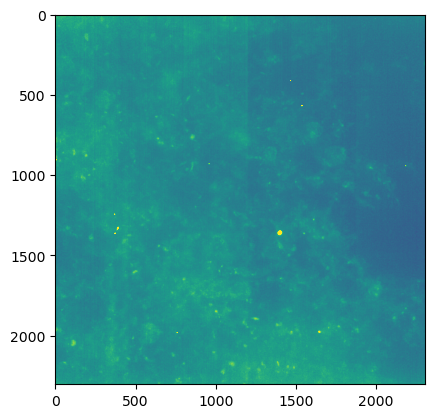

In [12]:
plt.imshow(images_array[2], vmax=100)

In [14]:
def normalize(img, data_type = float):
    img_min = np.min(img)
    img_max = np.max(img)

    new_min = 0
    if data_type == np.uint8:
        new_max = 2**8-1
    elif data_type == np.uint16:
        new_max = 2**16-1
    elif data_type == np.float:
        new_max = 1
        
    img_norm = (img - img_min) * ((new_max - new_min) / (img_max - img_min)) + new_min
    img_norm = img_norm.astype(data_type)
    return img_norm

In [16]:
for i, img in enumerate(images_array): #TODO load images and masks at the same and name them together
    img_norm = normalize(img, data_type = np.uint16)
    # label = mask_array[i]
    tifffile.imsave(f"/Users/peterpark/Data/DL4MIA_2024/splits/normalized/train/imgs/{image_files[i].name}", img_norm)


for i, img in enumerate(val_array):
    val_norm = normalize(img, data_type = np.uint16)
    tifffile.imsave(f"/Users/peterpark/Data/DL4MIA_2024/splits/normalized/validation/imgs/{val_files[i].name}", val_norm)
               
for i, img in enumerate(test_array):
    test_norm = normalize(img, data_type = np.uint16)
    tifffile.imsave(f"/Users/peterpark/Data/DL4MIA_2024/splits/normalized/test/imgs/{test_files[i].name}", test_norm)

/var/folders/jw/1ywzhzln6md6ldfh97849n900000gn/T/ipykernel_10050/959722199.py:4: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tifffile.imsave(f"/Users/peterpark/Data/DL4MIA_2024/splits/normalized/train/imgs/{image_files[i].name}", img_norm)
/var/folders/jw/1ywzhzln6md6ldfh97849n900000gn/T/ipykernel_10050/959722199.py:9: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tifffile.imsave(f"/Users/peterpark/Data/DL4MIA_2024/splits/normalized/validation/imgs/{val_files[i].name}", val_norm)
/var/folders/jw/1ywzhzln6md6ldfh97849n900000gn/T/ipykernel_10050/959722199.py:13: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tifffile.imsave(f"/Users/peterpark/Data/DL4MIA_2024/splits/normalized/test/imgs/{test_files[i].name}", test_norm)


In [ ]:
np.max(img)

In [ ]:
np.min(img)

In [ ]:
images_array.shape